In [48]:
import os
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

## Reading Wheeler et al. (2018)
- Synthetic streamflow data sets generated through the annealing method under three parameter configurations (100 stochastic flow scenarios in each)

In [2]:
data_folders = ["Wheeler/Annealing_120Hurst", "Wheeler/Annealing_150ias", "Wheeler/Annealing_Baseline"]

In [ ]:
data = dict()
for data_folder in data_folders:
    data[data_folder] = list()
    
    for trace_no in range(1,101):
        trace_df = dict()
        inflow_list = os.listdir(data_folder + "/trace" + str(trace_no))
        for inflow in inflow_list:
            if (".Inflow" in inflow):
                location = data_folder + "/trace" + str(trace_no) + "/" + inflow
                inflow_data = pd.read_csv(location)
                inflow_data = inflow_data.loc[2:].reset_index(drop = True)
                inflow_data.columns = [inflow]

                trace_df[inflow] = inflow_data[inflow].astype(float)
        
        data[data_folder].append(pd.DataFrame(trace_df))

In [ ]:
data.keys()

In [ ]:
data["120Hurst"] = data.pop("Wheeler/Annealing_120Hurst")
data["150ias"] = data.pop("Wheeler/Annealing_150ias")
data["Baseline"] = data.pop("Wheeler/Annealing_Baseline")

In [ ]:
data["Baseline"][99]

In [ ]:
# pickle.dump( data, open( "3sets_wheeler.p", "wb" ) )

In [2]:
data_read = pickle.load( open( "3sets_wheeler.p", "rb" ) )

In [3]:
data_read["Baseline"][99]["519.Inflow"].mean()*3600*24*365/1000000000

0.03644046111239999

Other flow data to read and combine with Wheeler:
- Mogren gaging station (near where White Nile reaches the Main Nile) [UNH/GRDC Composite Runoff Fields](https://www.compositerunoff.sr.unh.edu/html/Polygons/P1673100.html)
- Atbara at Kilo 3 gaging station (where Atbara river reaches the Main Nile) [Center for Sustainability and the Global Environment-
Nelson Institute for Environmental Studies](https://sage.nelson.wisc.edu/riverdata/station_table.php?qual=256&filenum=138)
- Gaging station before the Renaissance Dam (Seleshi Data)

In [4]:
mogren_summary = pd.read_csv("Data_Mogren.txt",
                    sep="\t", usecols=["Month","MinQ","MaxQ","MeanQ"])
mogren_summary

,Month,MinQ,MaxQ,MeanQ
0,1,735.0,1254.0,1010.799988
1,2,624.0,1101.0,776.299988
2,3,705.0,1015.0,793.299988
3,4,1033.0,1369.0,1160.599976
4,5,686.0,1306.0,1045.699951
5,6,659.0,902.0,763.400024
6,7,333.0,802.0,569.099976
7,8,300.0,1000.0,535.000000
8,9,632.0,995.0,844.400024
9,10,937.0,1295.0,1120.099976


In [5]:
atbara_70_years = pd.read_csv("Data_Atbara.txt",
                    skiprows=14, skipfooter=3,engine="python", sep="\t")
atbara_70_years

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Avg Annual
0,1912,11.20,2.00,0.0,0.0,0.0,48.60,742.0,2609,1284,151.0,52.50,17.20,409.79
1,1913,12.70,1.24,0.0,0.0,0.0,0.00,221.0,877,652,78.4,12.30,1.87,154.71
2,1914,0.00,0.00,0.0,0.0,0.0,3.86,586.0,2680,1265,384.0,127.00,30.60,423.04
3,1915,9.33,1.24,0.0,0.0,0.0,52.50,320.0,1142,1060,255.0,56.30,13.10,242.46
4,1916,1.87,0.00,0.0,0.0,0.0,30.50,1926.0,4928,2484,574.0,175.00,64.50,848.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1978,-9999.00,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,418.0,1347,594,291.0,17.00,0.00,-9999.00
67,1979,-9999.00,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,212.0,963,356,106.0,0.77,0.00,-9999.00
68,1980,-9999.00,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,290.0,1877,1033,113.0,17.90,0.00,-9999.00
69,1981,-9999.00,-9999.00,-9999.0,-9999.0,-9999.0,-9999.00,326.0,1183,1072,239.0,2.31,0.00,-9999.00


In [6]:
q_blue_nile_average = pd.Series([111,
                                72,
                                56,
                                55,
                                86,
                                254,
                                1006,
                                2160,
                                1698,
                                932,
                                377,
                                195])
q_blue_nile_average

0      111
1       72
2       56
3       55
4       86
5      254
6     1006
7     2160
8     1698
9      932
10     377
11     195
dtype: int64

## Let's complete 20 years of monthly data in the most basic fashion:
By repeating the average flows for the 12 months

In [7]:
repeated_blue_nile = pd.Series(list(q_blue_nile_average) * 20)
repeated_blue_nile

0       111
1        72
2        56
3        55
4        86
       ... 
235    2160
236    1698
237     932
238     377
239     195
Length: 240, dtype: int64

Total yearly input to th system in **BCM**

In [8]:
repeated_blue_nile.mean()*3600*24*365/1000000000

18.401256

In [9]:
repeated_mogren = pd.Series(list(mogren_summary["MeanQ"]) * 20)
repeated_mogren

0      1010.799988
1       776.299988
2       793.299988
3      1160.599976
4      1045.699951
          ...     
235     535.000000
236     844.400024
237    1120.099976
238    1065.199951
239    1083.300049
Length: 240, dtype: float64

In [10]:
repeated_mogren.mean()*3600*24*365/1000000000

28.296201313548003

In [11]:
atbara_70_years.columns

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'Avg Annual'],
      dtype='object')

In [12]:
months = list(atbara_70_years.columns[1:13])
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [13]:
mean_atbara = list()
for month in months:
    mean_atbara.append(np.mean\
        (list(filter(lambda x: x != -9999, atbara_70_years[month]))))
    
mean_atbara

[7.712786885245902,
 3.004426229508197,
 0.4216393442622951,
 1.4672131147540983,
 2.970983606557377,
 28.256393442622947,
 592.7859154929578,
 1979.0281690140846,
 1301.619718309859,
 304.04647887323944,
 63.12239436619718,
 28.43633802816902]

In [14]:
repeated_atbara = pd.Series(mean_atbara * 20)
repeated_atbara

0         7.712787
1         3.004426
2         0.421639
3         1.467213
4         2.970984
          ...     
235    1979.028169
236    1301.619718
237     304.046479
238      63.122394
239      28.436338
Length: 240, dtype: float64

In [15]:
repeated_atbara.mean()*3600*24*365/1000000000

11.3342288162272

In [16]:
repeated_atbara + repeated_mogren

0      1018.512775
1       779.304414
2       793.721627
3      1162.067189
4      1048.670935
          ...     
235    2514.028169
236    2146.019742
237    1424.146455
238    1128.322345
239    1111.736387
Length: 240, dtype: float64

## Collect the streamflow/gaging data from different sources in a dictionary:

Function for summing up the small numbered inflows in one Wheeler data frame to get the catchment inflows in my model:

In [17]:
def get_usable_inflows(raw_inflow_dict):
    """Sums the separate inflows which is received in the form of dict,
    and returns a dict of time-series inflows with the name in the model
    """
    
    output = dict()
    output["qDinder"] = raw_inflow_dict["340"] + raw_inflow_dict["635"] + \
        raw_inflow_dict["1308"]
    output["qRahad"] = raw_inflow_dict["243"] + raw_inflow_dict["519"] + \
        raw_inflow_dict["524"]
    output["qGERDToRoseires"] = raw_inflow_dict["33"] + raw_inflow_dict["530"] + \
        raw_inflow_dict["1374"]
    output["qRoseiresToAbuNaama"] = raw_inflow_dict["1309"]
    output["qSukiToSennar"] = raw_inflow_dict["470"]
    output["qWhiteNile"] = raw_inflow_dict["1364"] + raw_inflow_dict["1338"] + \
        raw_inflow_dict["1317"] + raw_inflow_dict["31"] + raw_inflow_dict["Mogren"]
    output["qAtbara"] = raw_inflow_dict["Atbara"]
    output["qBlueNile"] = raw_inflow_dict["BlueNile"]
    
    return output
    

Function that acquires the necessary small inflows from a Wheeler dataframe:

In [18]:
def get_raw_flows_from_df(full_df, sim_horizon, needed_flows):
    flows = dict()
    for number in needed_flows:
        series = full_df[f"{str(number)}.Inflow"]
        needed_slice = series[:sim_horizon*12]
        flows[str(number)] = needed_slice
        
    return flows

In [19]:
required_inflows = [340, 635, 1308, 33, 530, 1374, 1309, 470, 1364, 1338, 1317, 31, 243, 519, 524]
numbered_flows = get_raw_flows_from_df(data_read["Baseline"][99], 20, required_inflows)

In [20]:
numbered_flows.keys()

dict_keys(['340', '635', '1308', '33', '530', '1374', '1309', '470', '1364', '1338', '1317', '31', '243', '519', '524'])

In [21]:
unnumbered_flows = {"Atbara": repeated_atbara, "Mogren": repeated_mogren, "BlueNile": repeated_blue_nile}

In [22]:
numbered_flows.update(unnumbered_flows)
full_raw_flows = numbered_flows

In [23]:
full_raw_flows.keys()

dict_keys(['340', '635', '1308', '33', '530', '1374', '1309', '470', '1364', '1338', '1317', '31', '243', '519', '524', 'Atbara', 'Mogren', 'BlueNile'])

In [24]:
usable_catchments = get_usable_inflows(full_raw_flows)

In [25]:
usable_catchments.keys()

dict_keys(['qDinder', 'qRahad', 'qGERDToRoseires', 'qRoseiresToAbuNaama', 'qSukiToSennar', 'qWhiteNile', 'qAtbara', 'qBlueNile'])

## Writing the catchment inflows as with their usable filenames in the Nile model:

In [26]:
for catchment in usable_catchments.keys():
    with open(f"produced_data/Inflow{catchment}.txt", "w") as infile:
        for element in usable_catchments[catchment]:
            infile.write(f"{element}\n")

## Let's read the demand to repeat and do basic mass-balance validation:

In [34]:
full_demand = pd.read_csv("IrrigationDemands.csv")
full_demand

,Unnamed: 0,Upstream Sennar,Gezira Managil,Downstream Sennar,Taminiat to Hassanab,Hassanab to Dongola,Downstream HAD-Egypt
0,Jan,67.577658,319.593787,7.467145,18.667861,28.375149,1310.483871
1,Feb,66.137566,328.207672,8.267196,12.814153,19.841270,1620.370370
2,Mar,44.802867,155.316607,10.454002,5.227001,8.213859,1635.304659
3,Apr,34.722222,26.620370,11.574074,4.629630,6.944444,1589.506173
4,May,35.095579,51.523297,12.320789,7.093787,10.827360,1896.654719
5,Jun,77.160494,254.243827,12.731481,14.660494,22.376543,2438.271605
6,Jul,97.446237,349.835723,8.960573,13.440860,20.161290,2523.894863
7,Aug,93.712664,176.971326,7.093787,10.827360,16.054361,2202.807646
8,Sept,132.330247,361.882716,10.416667,20.447531,30.478395,1601.080247
9,Oct,148.222820,388.291517,11.200717,25.014934,37.709080,1452.359618


In [35]:
model_names = ["USSennar", "Gezira", "DSSennar", "Taminiat", "Hassanab", "Egypt"]

In [37]:
demand_series = dict()
for i, column in enumerate(full_demand.columns[1:]):
    one_year_series = full_demand[column]
    demand_series[model_names[i]] = pd.Series(list(one_year_series) * 20)


In [40]:
demand_series["Egypt"]

0      1310.483871
1      1620.370370
2      1635.304659
3      1589.506173
4      1896.654719
          ...     
235    2202.807646
236    1601.080247
237    1452.359618
238    1481.481481
239    1355.286738
Length: 240, dtype: float64

In [41]:
for demand_zone in demand_series.keys():
    with open(f"produced_data/IrrDemand{demand_zone}.txt", "w") as infile:
        for element in demand_series[demand_zone]:
            infile.write(f"{element}\n")

## Do quick mass-balance validation by summing all demands and inflows:

In [43]:
total_demand_series = 0
for demand in demand_series.values():
    total_demand_series += demand
total_inflow_series = 0
for catchment in usable_catchments.values():
    total_inflow_series += catchment

<AxesSubplot:>

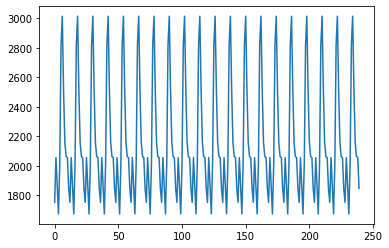

In [47]:
total_demand_series.plot.line()

<AxesSubplot:>

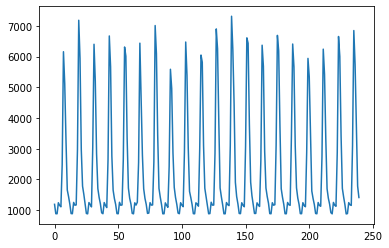

In [46]:
total_inflow_series.plot.line()

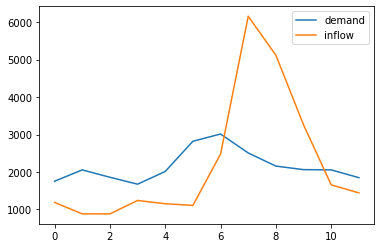

In [53]:
fig, ax = plt.subplots()
ax.plot(total_demand_series[0:12], label='demand')
ax.plot(total_inflow_series[0:12], label='inflow')
ax.legend()
plt.show()

In [54]:
import handcalcs.render

In [56]:
%%tex
a = 2
b = 3
c = 2*a + b/3

\[
\begin{aligned}
a &= 2 \; 
\\[10pt]
b &= 3 \; 
\\[10pt]
c &= 2 \cdot a + \frac{ b }{ 3 }  = 2 \cdot 2 + \frac{ 3 }{ 3 } &= 5.0  
\end{aligned}
\]
